In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving OnlineRetail.csv to OnlineRetail.csv


In [ ]:
data=pd.read_csv('OnlineRetail.csv',encoding= 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data.shape

(541909, 8)

In [ ]:
#Remove records that do not have a customer ID.
data= data[pd.notnull(data['CustomerID'])]

In [ ]:
#Create a new column for the total sales amount for each invoice in the data frame.
data['Sales'] = data['Quantity'] * data['UnitPrice']
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
#summarize sales amounts by CustomerID
df= data.groupby('CustomerID').agg({'Sales': sum, 
                               'InvoiceNo': lambda x: x.nunique()})
df.columns = ['TotalSales', 'OrderCount'] 
df.head(5)

,TotalSales,OrderCount
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,7
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1


In [ ]:
df['AvgOrderValue'] = df['TotalSales'] / df['OrderCount']
df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,0.00,2,0.000000
12347.0,4310.00,7,615.714286
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


In [ ]:
rank_df = df.rank(method='first')
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,-1.698182,-0.691236,-1.698182
12347.0,1.479522,1.026356,1.431195
12348.0,0.956639,0.344231,1.149155
12349.0,0.934456,-1.731457,1.702143
12350.0,-0.704704,-1.730664,0.669845


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

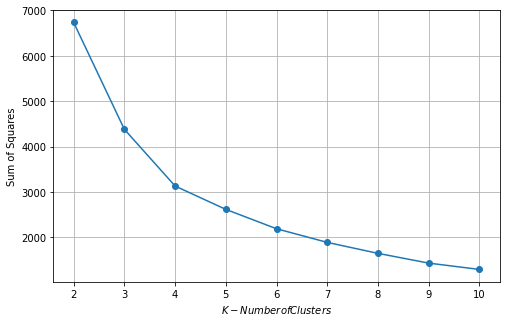

In [ ]:
sse = []
krange = list(range(2,11))
X = normalized_df[['TotalSales','OrderCount','AvgOrderValue']].values
for n in krange:
    model = KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

# Plot the results.
fig = plt.figure(figsize = (8,5))
plt.plot(krange, sse, marker='o')
plt.xlabel("$K - Number of Clusters$")
plt.ylabel("Sum of Squares")
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
four_clusters = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_clusters['Cluster'] = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
four_clusters

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,-1.698182,-0.691236,-1.698182,1
12347.0,1.479522,1.026356,1.431195,2
12348.0,0.956639,0.344231,1.149155,2
12349.0,0.934456,-1.731457,1.702143,3
12350.0,-0.704704,-1.730664,0.669845,3
...,...,...,...,...
18280.0,-1.237094,-0.692820,-0.553385,1
18281.0,-1.606282,-0.692028,-1.496951,1
18282.0,-1.257693,0.342647,-1.595190,1


In [ ]:
df1 = df
frame = pd.DataFrame(df1)
frame['Cluster'] = four_clusters['Cluster']
frame.head(5)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,0.00,2,0.000000,1
12347.0,4310.00,7,615.714286,2
12348.0,1797.24,4,449.310000,2
12349.0,1757.55,1,1757.550000,3
12350.0,334.40,1,334.400000,3


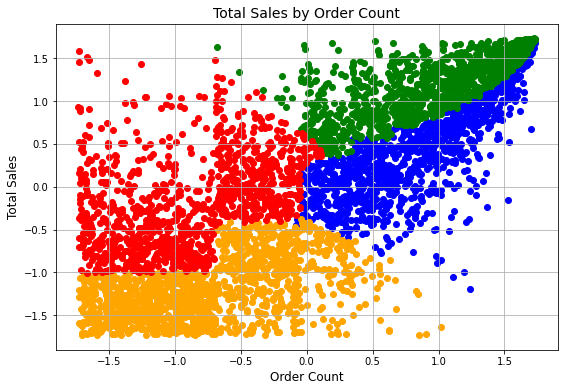

In [ ]:
fig = plt.figure(figsize = (9,6))
plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 0]['OrderCount'], 
    four_clusters.loc[four_clusters['Cluster'] == 0]['TotalSales'],
    c='blue')

plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 1]['OrderCount'], 
    four_clusters.loc[four_clusters['Cluster'] == 1]['TotalSales'],
    c='orange')

plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 2]['OrderCount'], 
    four_clusters.loc[four_clusters['Cluster'] == 2]['TotalSales'],
    c='green')

plt.scatter(
    four_clusters.loc[four_clusters['Cluster'] == 3]['OrderCount'], 
    four_clusters.loc[four_clusters['Cluster'] == 3]['TotalSales'],
    c='red')

plt.title('Total Sales by Order Count', size=14)
plt.xlabel('Order Count', size=12)
plt.ylabel('Total Sales', size=12)

plt.grid()
plt.show()